In [69]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [70]:
file_path = '/Users/shiwei/Desktop/Clickbait.csv'

In [71]:
df = pd.read_csv(file_path)

In [72]:
df

,title,label
0,"15 Highly Important Questions About Adulthood,...",clickbait
1,250 Nuns Just Cycled All The Way From Kathmand...,clickbait
2,"Australian comedians ""could have been shot"" du...",not-clickbait
3,Lycos launches screensaver to increase spammer...,not-clickbait
4,Fußball-Bundesliga 2008–09: Goalkeeper Butt si...,not-clickbait
...,...,...
9995,Which Celebrity Should Actually Be Your Valentine,clickbait
9996,"New Orleans DirectNIC Offices, 'Outpost Crysta...",not-clickbait
9997,Poll: Do You Actually Work For The First Order,clickbait
9998,Steady Guard Guides Spartans Past Kansas,not-clickbait


In [73]:
# 文本清洗函数
def clean_text(text):
    # 转换为小写
    text = text.lower()
    # 去除网址
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # 去除标签和提及
    text = re.sub(r'@[\w]*', '', text)
    text = re.sub(r'#[\w]*', '', text)
    # 去除特殊字符和标点符号
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

In [74]:
# 应用文本清洗函数
df['title'] = df['title'].apply(clean_text)

In [75]:
df

,title,label
0,highly important questions about adulthood an...,clickbait
1,nuns just cycled all the way from kathmandu t...,clickbait
2,australian comedians could have been shot duri...,not-clickbait
3,lycos launches screensaver to increase spammer...,not-clickbait
4,fuballbundesliga goalkeeper butt signs with b...,not-clickbait
...,...,...
9995,which celebrity should actually be your valentine,clickbait
9996,new orleans directnic offices outpost crystal ...,not-clickbait
9997,poll do you actually work for the first order,clickbait
9998,steady guard guides spartans past kansas,not-clickbait


In [76]:
# 去除停用词函数
# stop_words = set(stopwords.words('english'))
# def remove_stopwords(text):
#     words = word_tokenize(text)
#     filtered_words = [word for word in words if word not in stop_words]
#     return ' '.join(filtered_words)

In [77]:
# 应用去除停用词函数
# df['title'] = df['title'].apply(remove_stopwords)

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [79]:
X = df['title']  # 特征列：标题
y = df['label']  # 标签列：clickbait 或 not-clickbait

In [80]:
# 步骤 3: 数据划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [81]:
# 步骤 4: 特征工程 - 使用TF-IDF向量化器
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # 根据需求调整max_features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [82]:
# 步骤 5: 标签编码（如果标签是字符串）
# 如果标签已经是0和1，这一步可以跳过
# 如果标签是字符串 "clickbait" 和 "not-clickbait"，可以使用以下方式进行编码
y_train = y_train.map({'clickbait': 1, 'not-clickbait': 0})
y_test = y_test.map({'clickbait': 1, 'not-clickbait': 0})

In [83]:
# 步骤 6: 训练SVM模型
model = SVC(kernel='linear', C=1.0)
model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [84]:
# 步骤 7: 模型评估
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9613333333333334
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1513
           1       0.97      0.95      0.96      1487

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000

[[1471   42]
 [  74 1413]]


提供的评估结果是模型在测试数据上的性能报告以及混淆矩阵。以下是对这些结果的详细解释：

**准确性 (Accuracy): 0.961**
准确性表示模型正确分类的样本比例。在这种情况下，模型的准确性为0.961，这意味着它正确分类了96.1%的测试样本。

精确度 (Precision):
对于类别0 ("not-clickbait")：0.95
精确度表示模型正确分类为 "not-clickbait" 的样本比例。在这里，它正确分类了95%的 "not-clickbait" 样本。
对于类别1 ("clickbait")：0.97
精确度表示模型正确分类为 "clickbait" 的样本比例。在这里，它正确分类了97%的 "clickbait" 样本。

召回率 (Recall):
对于类别0 ("not-clickbait")：0.97
召回率表示模型正确找到所有 "not-clickbait" 样本的比例。在这里，它找到了97%的 "not-clickbait" 样本。
对于类别1 ("clickbait")：0.95
召回率表示模型正确找到所有 "clickbait" 样本的比例。在这里，它找到了95%的 "clickbait" 样本。

F1分数 (F1-Score):
F1分数是精确度和召回率的调和平均数，用于综合评估分类器的性能。
对于类别0 ("not-clickbait")：0.96
对于类别1 ("clickbait")：0.96

支持 (Support):
"support" 表示每个类别在测试数据中的样本数量。在这里，类别0有1513个样本，类别1有1487个样本。

混淆矩阵 (Confusion Matrix):
混淆矩阵显示了模型的分类结果。
对于类别0 ("not-clickbait")，有1471个样本被正确分类为 "not-clickbait"，42个被错误分类为 "clickbait"。
对于类别1 ("clickbait")，有74个样本被错误分类为 "not-clickbait"，1413个被正确分类为 "clickbait"。

综合来看，这个模型在测试数据上表现非常不错，具有高准确性、精确度和召回率。它在区分 "clickbait" 和 "not-clickbait" 样本方面取得了很好的性能。然而，具体的评估结果的重要性可能取决于应用场景，例如，如果对误报有严格要求，可以进一步优化模型。

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

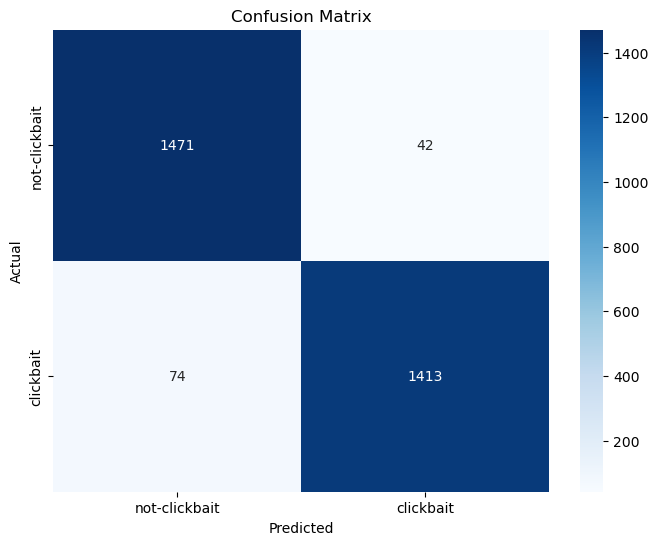

In [86]:
# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 创建热图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['not-clickbait', 'clickbait'], yticklabels=['not-clickbait', 'clickbait'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 预测新数据

In [87]:
file_path_class = '/Users/shiwei/Desktop/研究论文/一带一路ERGM数据分析/聚类分析16244.csv'

In [88]:
df_toclass = pd.read_csv(file_path_class)

In [89]:
# 文本清洗函数
def clean_text(text):
    # 转换为小写
    text = text.lower()
    # 去除网址
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # 去除标签和提及
    text = re.sub(r'@[\w]*', '', text)
    text = re.sub(r'#[\w]*', '', text)
    # 去除特殊字符和标点符号
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

In [90]:
# 应用文本清洗函数
df_toclass['text'] = df_toclass['text'].apply(clean_text)

In [91]:
df_toclass

,text
0,the new silk road brings weapons to gaza and b...
1,the roving eye pipelineistan and the new silk...
2,riding the new silk road
3,riding the new silk road
4,while the us talks about saving afghanistan wi...
...,...
16236,hong kong special administrative region chief ...
16237,hong kong special administrative region chief ...
16238,s business leaders on sunday hailed s belt and...
16239,in a highspirited pitch at s chief executive...


In [92]:
# 去除冗余信息和处理缺失值
df_toclass = df_toclass[['text']].drop_duplicates().dropna()

In [93]:
df_toclass.reset_index(drop=True, inplace = True)

In [94]:
df_toclass

,text
0,the new silk road brings weapons to gaza and b...
1,the roving eye pipelineistan and the new silk...
2,riding the new silk road
3,while the us talks about saving afghanistan wi...
4,china is building a new silk road in afghanist...
...,...
13039,exclusive thai deputy pm on blood ties chinese...
13040,in an exclusive interview with china daily hon...
13041,hong kong special administrative region chief ...
13042,s business leaders on sunday hailed s belt and...


In [98]:
# 创建一个TF-IDF向量化器（使用与训练时相同的参数）
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [99]:
# 使用向量化器将新文本转换为特征向量
new_text_tfidf = tfidf_vectorizer.transform(df_toclass['text'][20:30].to_list())#df_toclass['text'][1])
prediction = model.predict(new_text_tfidf)

In [100]:
print(prediction)

[0 0 0 0 1 0 1 1 0 0]


In [101]:
df_toclass['text'][20:30].to_list()

['opinion new silk road starting in xian should be part of strategy to develop chinas western region  ',
 'opinion new silk road economic belt centred around xian could help modernise western china  ',
 'new silk road internet drug bazaar opens a month after fbi bust ',
 'new silk road internet drug bazaar opens a month after fbi bust  ',
 'silk road is back  explains how it was reborn ',
 'new silk road drug bazaar opens a month after fbi bust ',
 'the feds shut down silk road  the amazon of illegal drugs  but its now reemerged ',
 'it wasnt shut down for long heres how silk road the amazon of illegal drugs was reborn  by ',
 'putin in seoul pushes new silk road via north korea ',
 ' new silk road model contest finals in tianjin models compete at the finals of the st new silk road mod ']